# Generate and save persistence diagrams of protein data  
Author: Amish Mishra  
Date: March 23, 2023  
- This notebook generates the weighted alpha persistence diagrams for the synthetic protein data.  
- It iterates through each protein's pdb file, extracts the atomic coordinates and atom element type, generates the persistence diagram based on the weighted alpha filtration (weights based on van der waal radius of each atom), saved the diagrams in the folder `protein_pds`
- Use `cder2` kernel

In [3]:
import numpy as np
import os
from Bio import PDB
import matplotlib.pyplot as plt
import gudhi as gudhi

In [28]:
def extract_atoms_info(filename, verbose=True):
    """
    Gets the atomic coordinates and element names for each atom of a given protein
    :param filename: string giving name of the pdb file
    :param verbose: if set to True, it prints the number of atoms and the filename that got loaded
    :return: coordinates of atoms and a list of the atom element types
    """
    parser = PDB.PDBParser(QUIET=True)
    struct = parser.get_structure('', filename)
    atoms = struct.get_atoms()
    atomic_coords = []
    element_names = []
    for atom in atoms:
        element_name = atom.element.upper()
        x,y,z = atom.get_coord()
        atomic_coords.append([x,y,z])
        element_names.append(element_name)
    atomic_coords = np.array(atomic_coords)
    if verbose:
        print('Loaded', len(atomic_coords), 'atoms from', filename)
    return atomic_coords, element_names


def see_3d_plot(data, name):
    """
    see a 3d plot of the protei 
    :param data: nx3 array of data points in 3d space
    :param name: title to assign the visual when done (usually the name of the protein)
    :return: nothing
    """
    X, Y, Z = data.T
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, s=1, c='r')
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    ax.set_title('Atoms in ' + name)
    # ax.view_init(elev=0, azim=15, roll=0)
#     plt.savefig('figures/sample_protein_plot.svg', format='svg')
#     plt.savefig('figures/sample_protein_plot.eps', format='eps')
    plt.show()
    

def convert_element_name_to_van_der_waal(element_list):
    """
    Takes a list of elements and converts each to its corresponding van der waal radius
    :param element_list: list of strings representing the element type of an atom
    :return: list corresponding to the weights of each element type atom
    """
    element_van_der_waal_radius = {"H": 1.2, "C": 1.7 , "N": 1.55, "O": 1.52, "S": 1.8}
    atom_weights = element_list.copy()
    for i, elem in enumerate(atom_weights):
        atom_weights[i] = element_van_der_waal_radius[elem]
    return atom_weights

def graph_protein_and_pd(protein_coords, atom_weights, filename):
    """
    Graph the protein and its persistence diagram (uses the see_3d_plot function)
    :param protein_coords: nx3 array of coordinates for the atoms
    :param atom_weights: list of the weights of atoms corresponding to each atom's element
    :param filename: string name of the pdb file
    :return: nothing
    """
    see_3d_plot(protein_coords, filename)
    fig, ax1 = plt.subplots(1, 1, figsize=(4,4))
    stree = gudhi.AlphaComplex(points = protein_coords, weights= atom_weights).create_simplex_tree()
    dgm = stree.persistence()
    gudhi.plot_persistence_diagram(dgm, legend = True, axes=ax1)
    ax1.set_title('PD')
#     plt.savefig('figures/sample_protein_pd.svg', format='svg')
#     plt.savefig('figures/sample_protein_pd.eps', format='eps')
    plt.show()

## Sample protein and PD plot

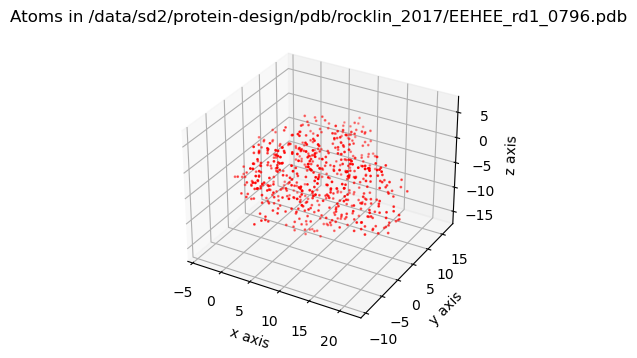

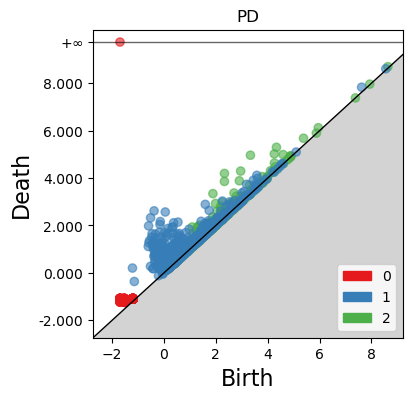

In [29]:
root_pd_dir = '/data/sd2/protein-design/pdb/'
person_dir = 'rocklin_2017'
raw_pdb_dir = root_pd_dir + person_dir
filename = 'EEHEE_rd1_0796.pdb'
f = os.path.join(raw_pdb_dir, filename)
 
# get atomic coordinates and the weights for each atom
pdb_coords, pdb_element_names = extract_atoms_info(f, verbose=False)
atom_weights = convert_element_name_to_van_der_waal(pdb_element_names)

graph_protein_and_pd(pdb_coords, atom_weights, f)

In [22]:
root_pd_dir = '/data/sd2/protein-design/pdb/'
person_dir = 'rocklin_2017'
raw_pdb_dir = root_pd_dir + person_dir

i = 0
for filename in os.listdir(raw_pdb_dir):
    f = os.path.join(raw_pdb_dir, filename)
    
    # get atomic coordinates and the weights for each atom
    pdb_coords, pdb_element_names = extract_atoms_info(f, verbose=False)
    atom_weights = convert_element_name_to_van_der_waal(pdb_element_names)

    # get persistence diagrams for H_0, H_1, H_2
    stree = gudhi.AlphaComplex(points = pdb_coords, weights= atom_weights).create_simplex_tree()
    stree.compute_persistence()
    dgms = np.array([stree.persistence_intervals_in_dimension(x) for x in range(3)], dtype=object)
    save_file = filename[:-4]  # remove .pdb extension from name
    pds_path = f'./protein_pds/{save_file}.pkl'
    dgms.dump(pds_path)  # save the persistence diagrams
    print('Done with PD number', i) if i%100 == 0 else None
    i += 1

Done with PD number 0
Done with PD number 100
Done with PD number 200
Done with PD number 300
Done with PD number 400
Done with PD number 500
Done with PD number 600
Done with PD number 700
Done with PD number 800
Done with PD number 900
Done with PD number 1000
Done with PD number 1100
Done with PD number 1200
Done with PD number 1300
Done with PD number 1400
Done with PD number 1500
Done with PD number 1600
Done with PD number 1700
Done with PD number 1800
Done with PD number 1900
Done with PD number 2000
Done with PD number 2100
Done with PD number 2200
Done with PD number 2300
Done with PD number 2400
Done with PD number 2500
Done with PD number 2600
Done with PD number 2700
Done with PD number 2800
Done with PD number 2900
Done with PD number 3000
Done with PD number 3100
Done with PD number 3200
Done with PD number 3300
Done with PD number 3400
Done with PD number 3500
Done with PD number 3600
Done with PD number 3700
Done with PD number 3800
Done with PD number 3900
Done with PD